In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random as rdm

In [2]:
# Grab and process the raw data.
data_path = (r"https://raw.githubusercontent.com/frendy1/Data-Science/master/amazon_cells_labelled.csv"
            )
sms_raw = pd.read_csv(data_path, header=None)
sms_raw.columns = ['sentence', 'score']
sms_raw.head()

sentence  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1

In [3]:
keywords_list = [
                 'awesome','fantastic','will get it again','quickly','less expensive','not distracting',
                 'everything','100','very helpful','prevents','outperform','seriously',r"can't beat",
                 'smoothly','less','easy to set up','easy to use','sturdy','wind-resistant','fabulous',
               
    
                 'better','fine','sweetest','best','better','excellent','beautiful','easier','great','pleased',
                 'love','impressed','pretty easy','happy','clearer','clear','wow','like','secure','charm',
                 'satisfied','joy','works','very good','10','right','quality','happier','feels good',
                 'would really recommend', 'would recommend','cool','better','flawless','no static'
                 'wonderfully','cheaper','saved','exceptional','perfectly','quite comfortable','fits',
               
                  
                 'fails','not enough','lousy','breaks','return','refund','cannot','complain',
                 'returning','weak','useless','worst','break','broke','fail','failed','terible','lose',
                 'crap','sucks','bad','low quality','warning','discomfort',r"dont' trust",'not good',
                 'dont buy it','did not work','Not as good','awkward','unreliable','disappointing',
                 'wont work','would not work','Would not reccommend','Would not',r"wouldn't",'smoke'
                 ]

In [4]:
# Instantiate our model and store it in a new variable.    
bnb = BernoulliNB()
clf = BernoulliNB()
X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = []
y_test = []
y_pred = []
df_holdouts = pd.DataFrame()

X = pd.DataFrame()
y = pd.DataFrame()

df_split = pd.DataFrame()

In [5]:
def do_holdouts():


    global df_holdouts
    global clf
    global X_train, X_test, y_train, y_test
    
    # Test your model with different holdout groups.
    # Use train_test_split to create the necessary training and test groups
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
    X_train = X_train.reindex(np.random.permutation(X_train.index))
    y_train = y_train.reindex(np.random.permutation(y_train.index))
    X_train_sample = X_train.sample(450)
    y_train_sample = y_train.sample(450)
    clf = bnb.fit(X_train_sample, y_train_sample)
    
    sc_20pct = clf.score(X_test, y_test)
    sc_sample = bnb.fit(X, y).score(X, y)
    df_holdouts = pd.DataFrame({'20pct':[sc_20pct],'sample':sc_sample})


In [6]:
def do_split_diagnosis():
    global test_sizes,scores,df_split
    
    #The effect of train-test split sizes
    test_sizes = [0.1 * i for i in range(1, 10)]
    scores = []
    split_list = []
    for test_size in test_sizes:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=20)
            split_list.append([X_train.shape, X_test.shape, y_train.shape, y_test.shape])
            clf = bnb.fit(X_train, y_train)
            scores.append(clf.score(X_test, y_test))
    df_split = pd.DataFrame(split_list, columns=['X_train','X_test','y_train','y_test'])

    print("===================================Split Shapes========================================")
    print(df_split)
    print("===================================Graphics========================================")
    fig, ax = plt.subplots()
    ax.plot(test_sizes, scores, 'k-d')
    ax.set_title("Effect of Proportion of Train-Test Splits", y=1.05,size=15)
    ax.set_ylabel(r"Classification Score", labelpad=5, size=10)
    ax.set_xlabel(r"Proportion of Test-Data" , labelpad=5, size=10)
    #plt.savefig('train-test-splits.png')
    plt.tight_layout()
    plt.show()

In [7]:
def do_pred():
    global y_pred
    # Make predictions
    y_pred = clf.predict(X)
 

In [8]:
def do_summary():
    
    print("==============================================Summary================================================")
    # Display our results.
    print("============================================Classes Values===========================================")
    print(sms_raw['score'].value_counts())
    print("==========================df_holdouts======================================")
    print(df_holdouts)
    print("Number of mislabeled points out of a total {} points : {}".format(
        X.shape[0],
        (y != y_pred).sum()
    ))

    print("========================================================METRICS==========================================")
    #extracting true_positives, false_positives, true_negatives, false_negatives
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
    #Accuracy
    Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
    print("Accuracy {:0.2f}%:".format(Accuracy))
    #Precision 
    Precision = tp/(tp+fp) 
    print("Precision {:0.2f}".format(Precision))
    #Recall 
    Recall = tp/(tp+fn) 
    print("Recall {:0.2f}".format(Recall))
    #Specificity 
    Specificity = tn/(tn+fp)
    print("Specificity {:0.2f}".format(Specificity))
    #F1 Score
    f1 = (2*Precision*Recall)/(Precision + Recall)
    print("F1 Score {:0.2f}".format(f1))
    #F-beta score calculation
    def fbeta(precision, recall, beta):
        return ((1+pow(beta,2))*precision*recall)/(pow(beta,2)*precision + recall)

    f2 = fbeta(Precision, Recall, 2)
    f0_5 = fbeta(Precision, Recall, 0.5)

    print("F2 {:0.2f}".format(f2))
    print("F0.5 {:0.2f}".format(f0_5))


In [9]:
def do_confusion():
    global y_pred
    y_actu = pd.Series(y, name='Actual')
    y_pred = pd.Series(y_pred, name='Predicted')
    df_confusion = pd.crosstab(y_actu, y_pred)
    print(df_confusion)
    
    sns.heatmap(df_confusion,annot=True,cmap="Greens",fmt='g')
    plt.show()

In [10]:
def do_roc():
    #ROC
    import scikitplot as skplt #to make things easy
    LR = LogisticRegression()
    LR.fit(X,y)
    y_pred_proba = LR.predict_proba(X)
    skplt.metrics.plot_roc_curve(y, y_pred_proba)
    plt.show()

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


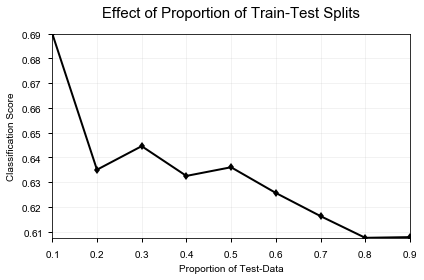

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.535   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


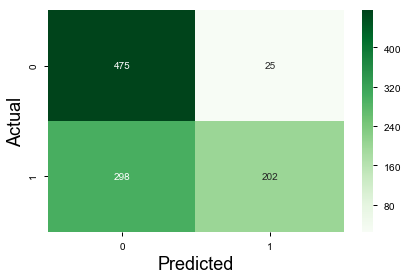

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


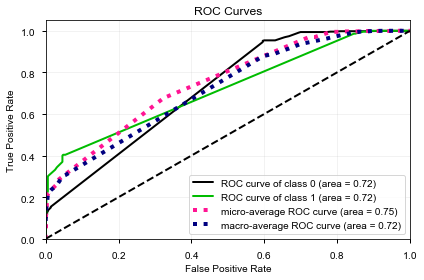

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


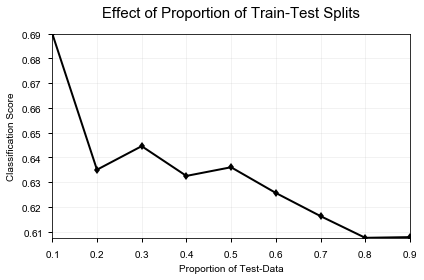

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.415   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


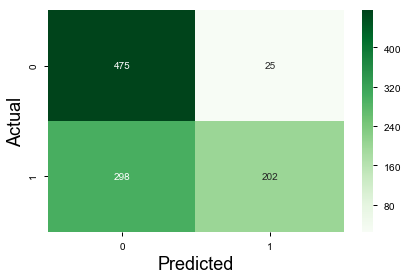

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


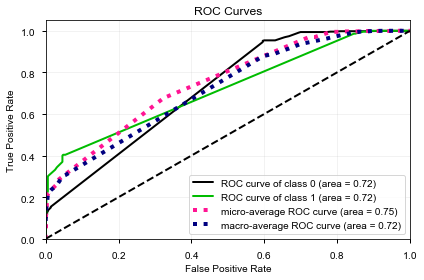

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


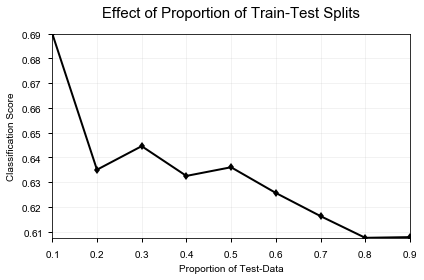

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.49   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


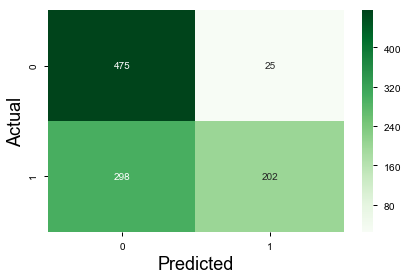

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


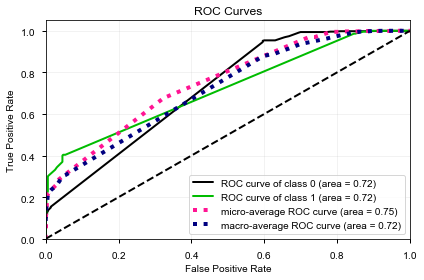

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


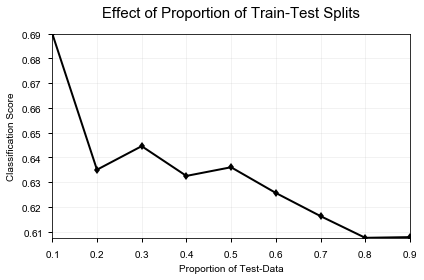

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.425   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


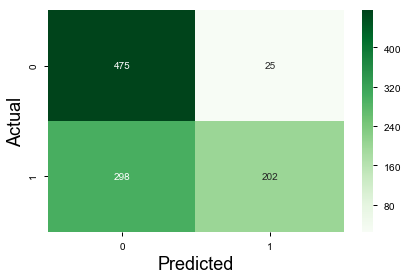

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


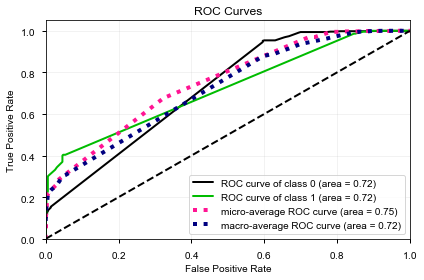

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


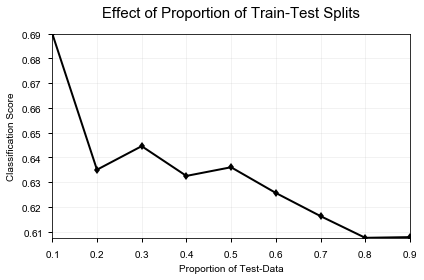

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.595   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


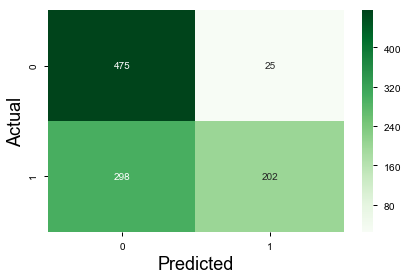

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


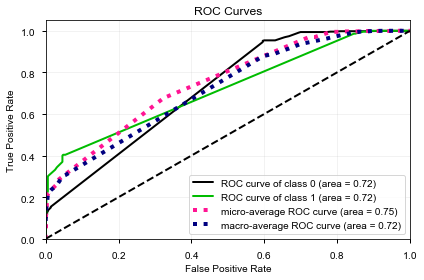

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


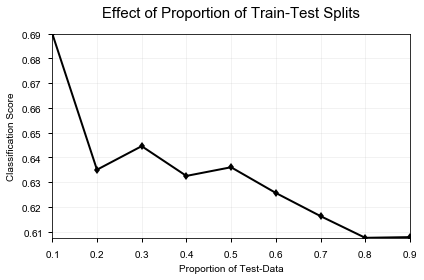

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.55   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


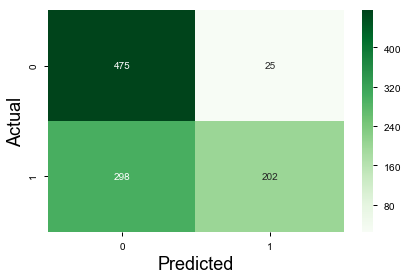

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


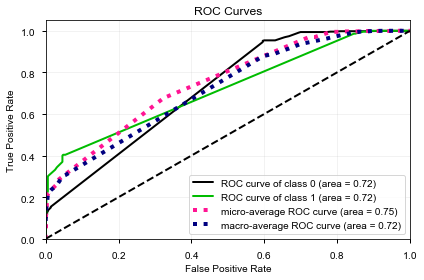

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


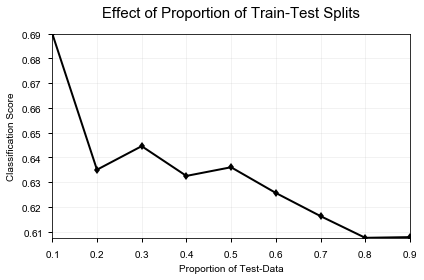

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.45   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


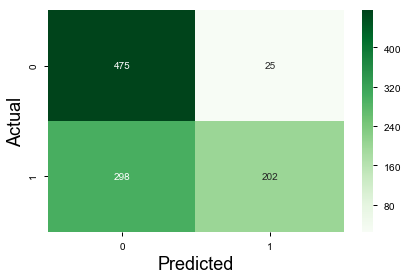

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


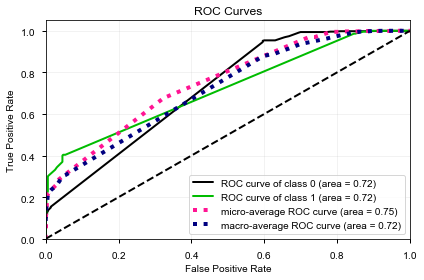

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


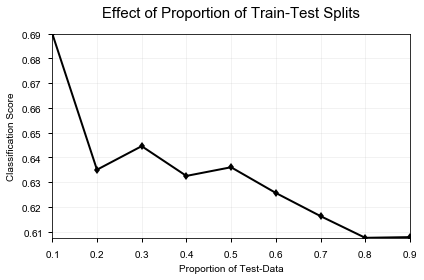

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.48   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


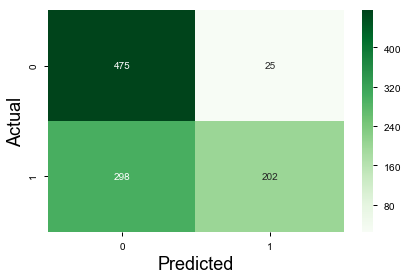

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


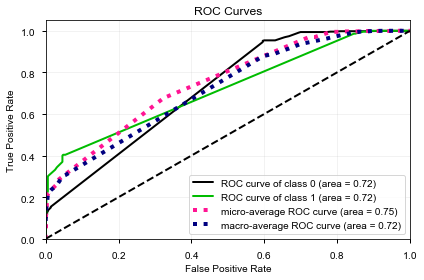

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


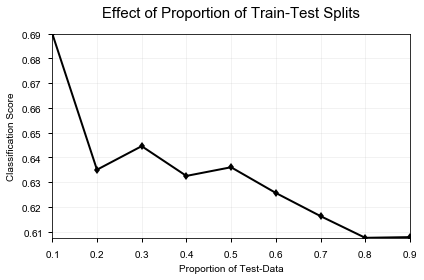

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.555   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


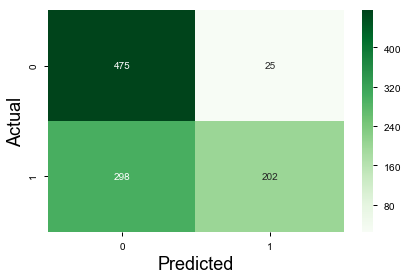

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


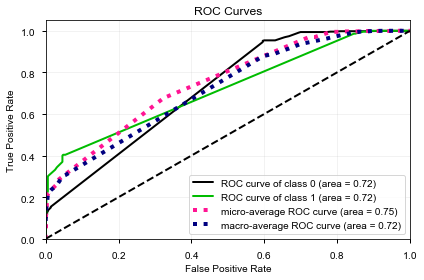

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


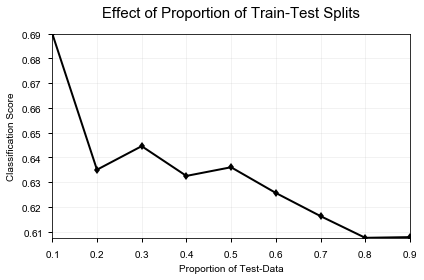

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.405   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


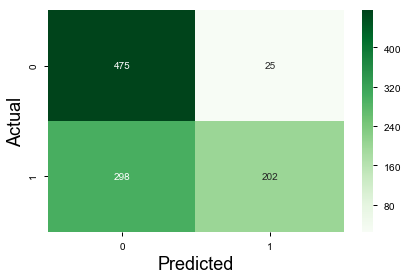

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


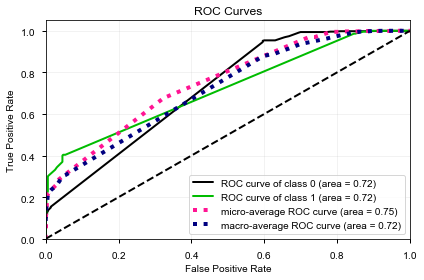

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


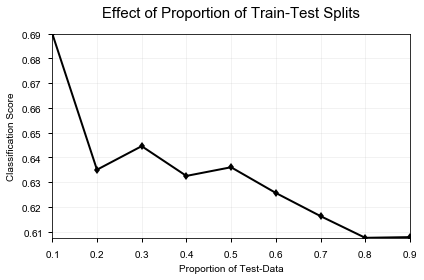

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.555   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


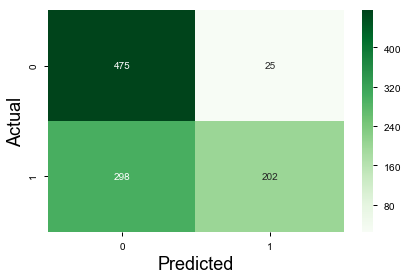

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


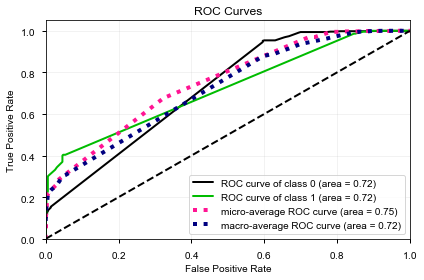

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


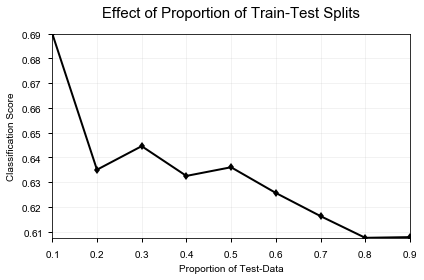

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.55   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


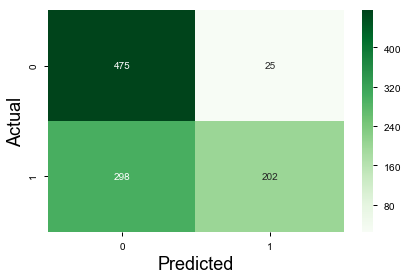

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


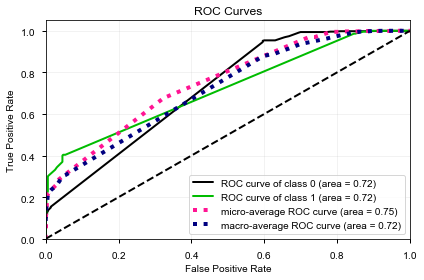

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


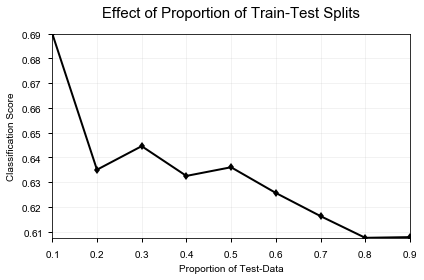

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.435   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


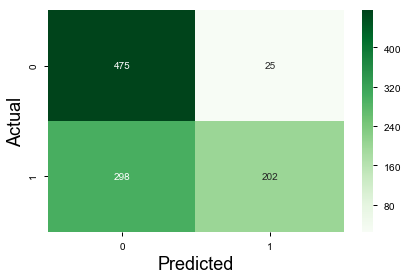

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


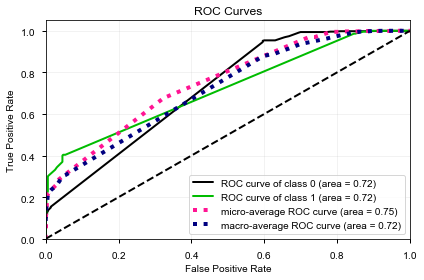

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


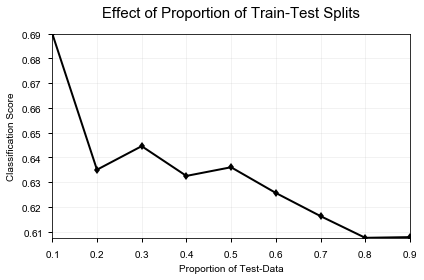

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.56   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


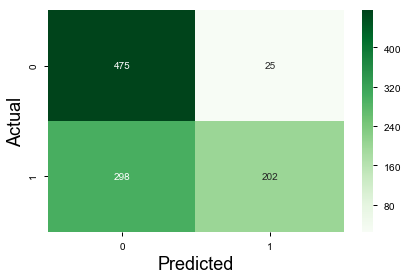

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


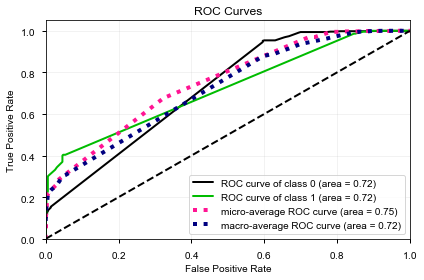

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


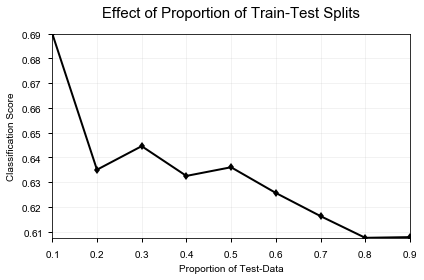

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.58   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


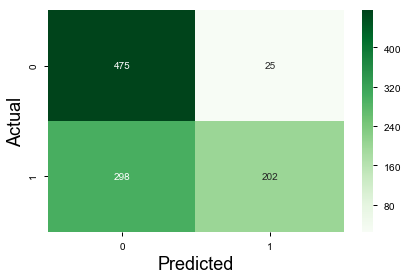

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


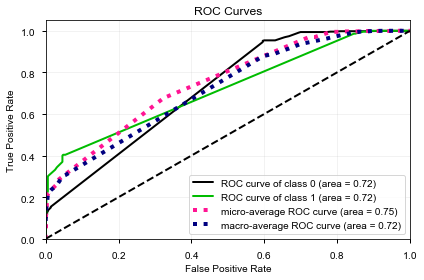

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


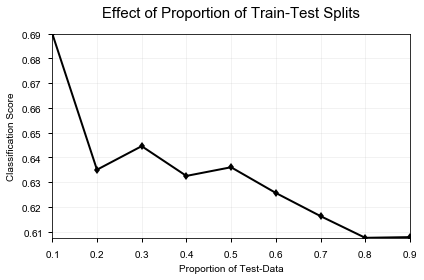

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.56   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


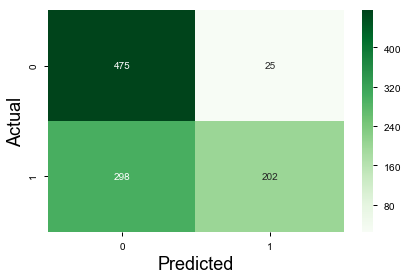

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


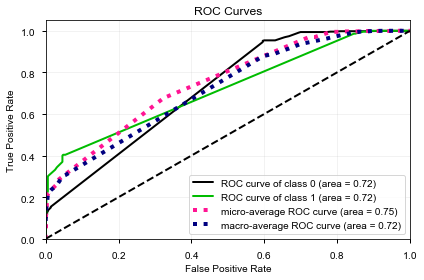

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


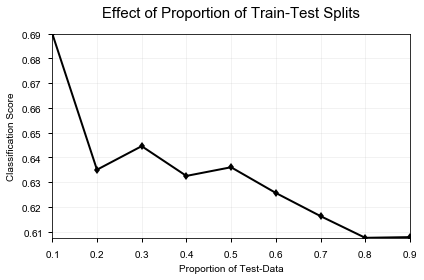

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.445   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


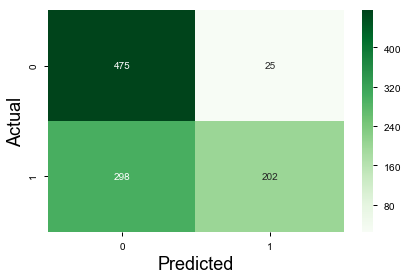

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


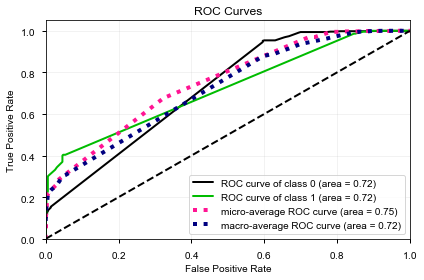

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


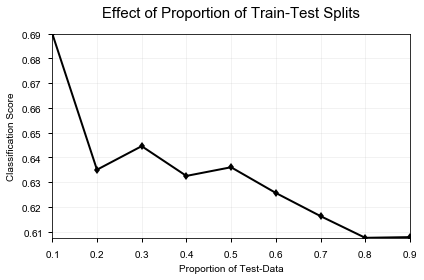

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.45   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


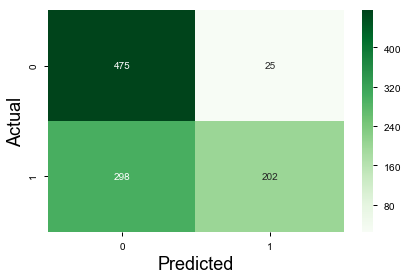

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


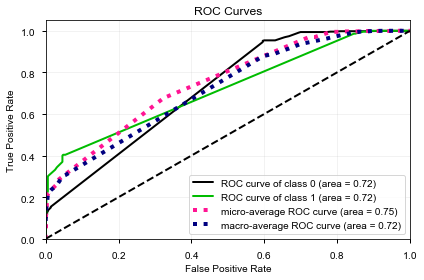

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


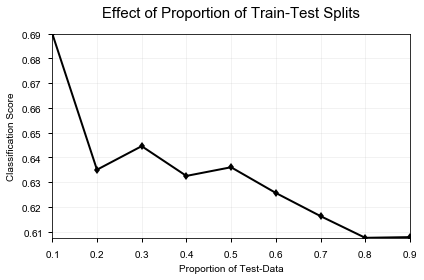

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0    0.4   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


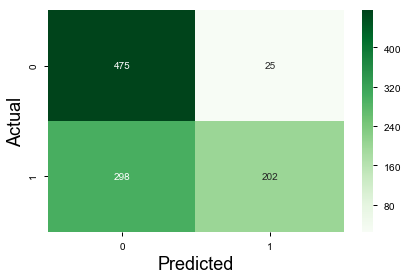

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


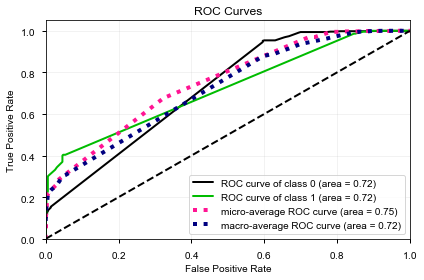

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


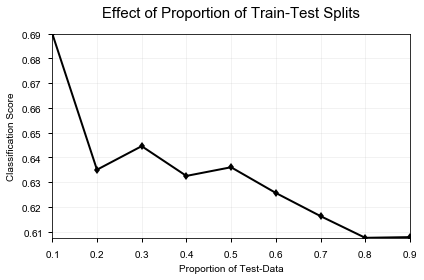

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0    0.5   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


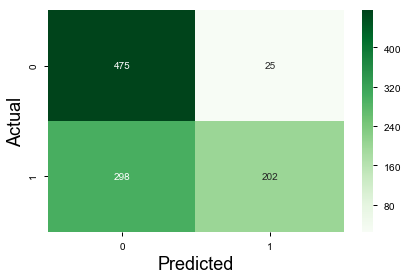

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


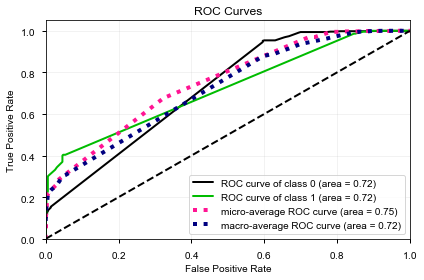

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


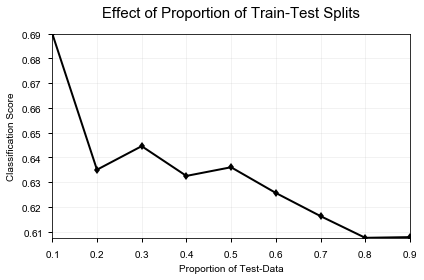

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.57   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


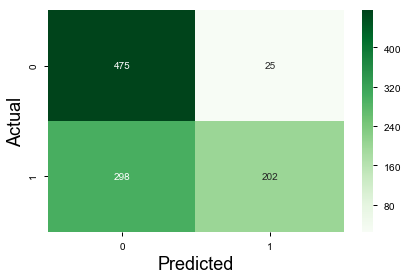

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


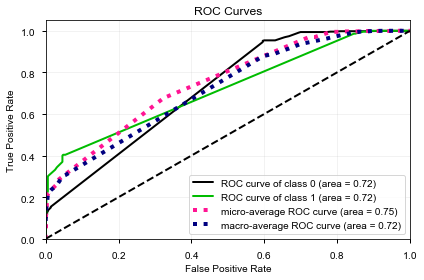

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


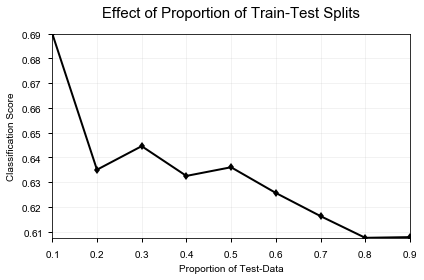

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.44   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


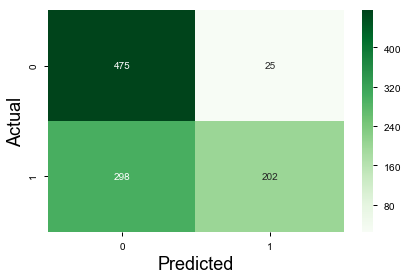

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


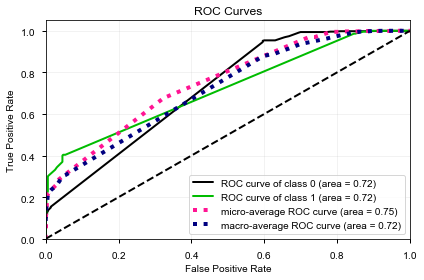

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


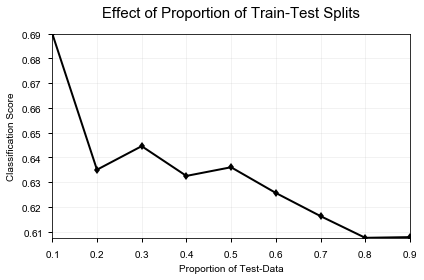

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.475   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


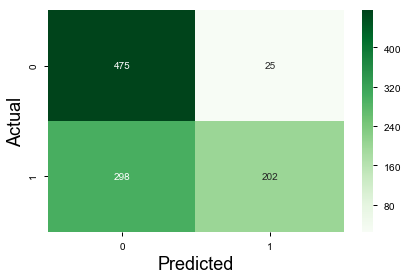

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


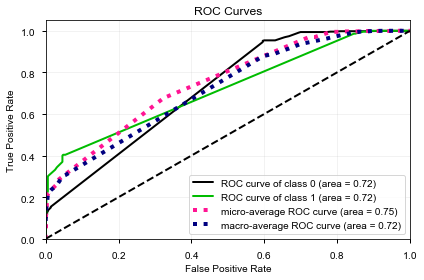

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


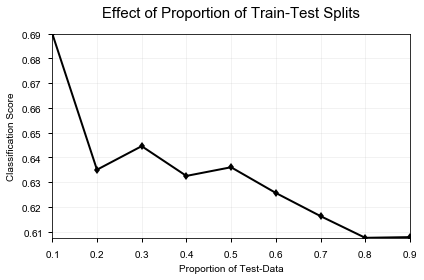

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.435   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


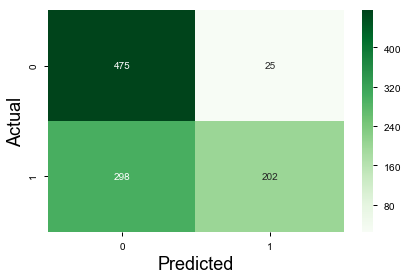

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


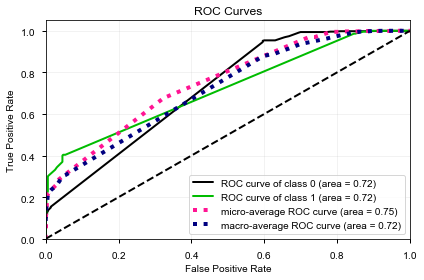

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


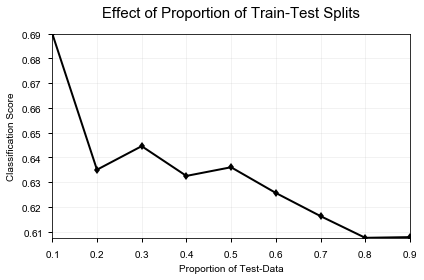

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.555   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


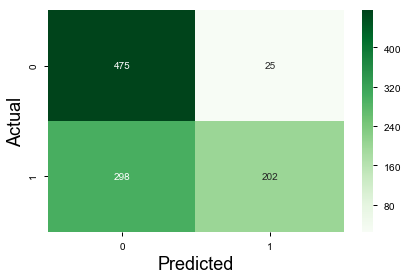

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


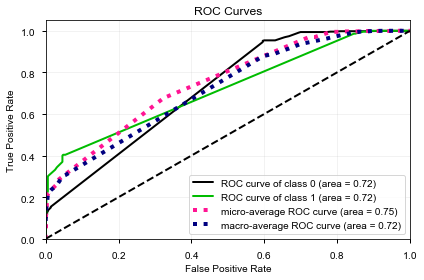

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


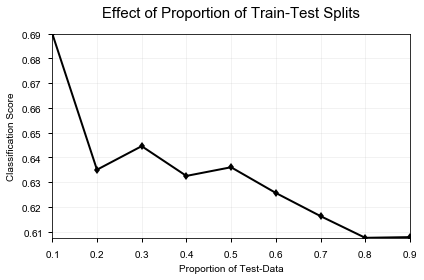

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.51   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


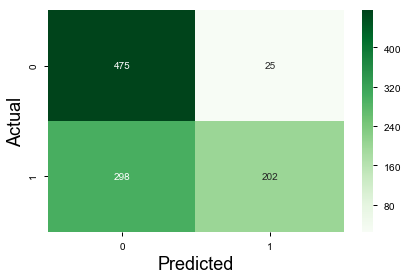

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


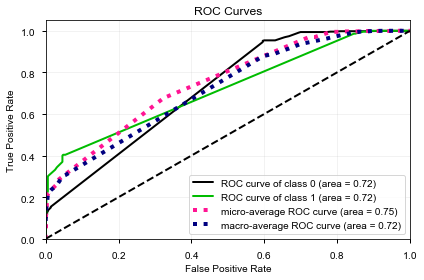

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


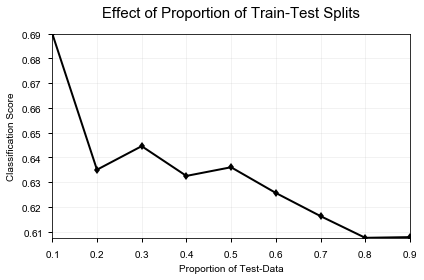

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.595   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


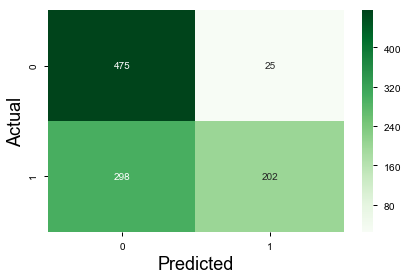

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


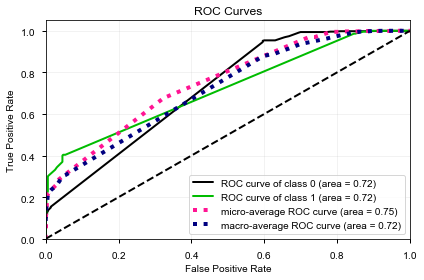

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


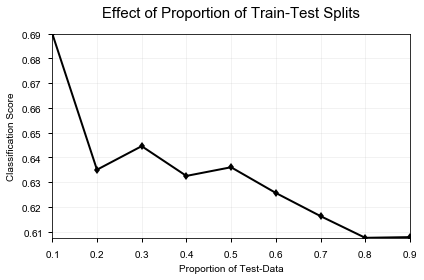

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.575   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


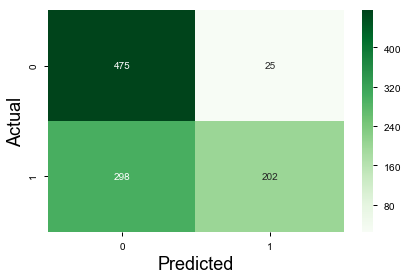

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


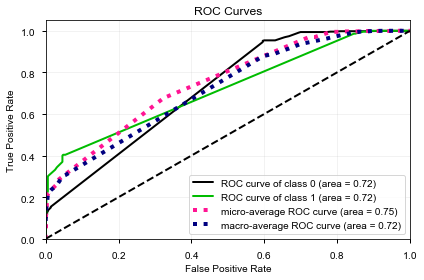

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


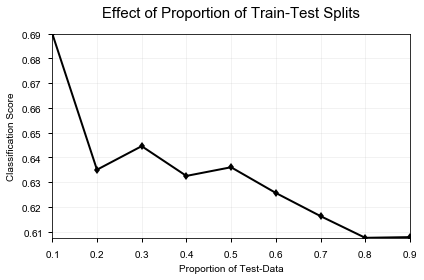

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.515   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


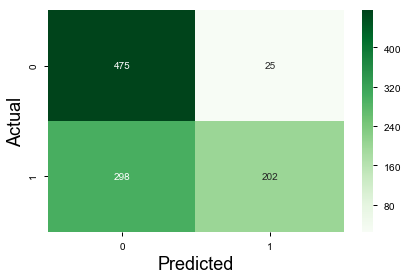

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


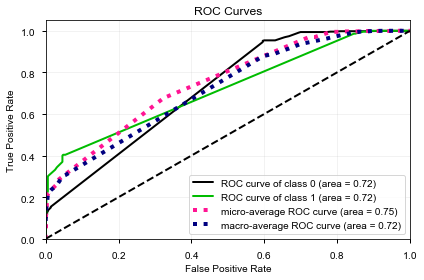

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


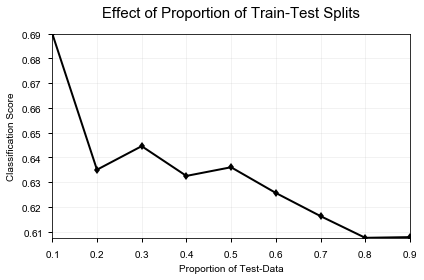

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.545   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


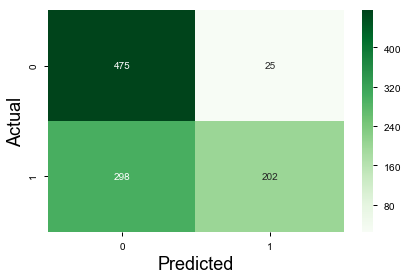

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


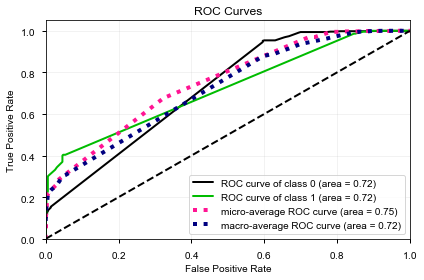

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


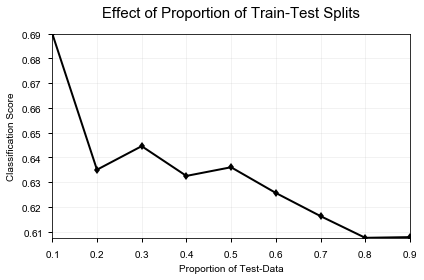

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.54   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


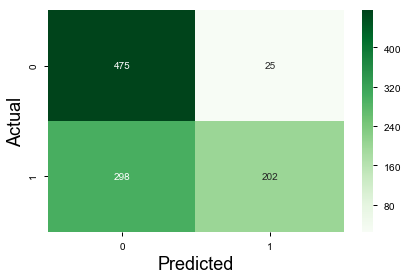

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


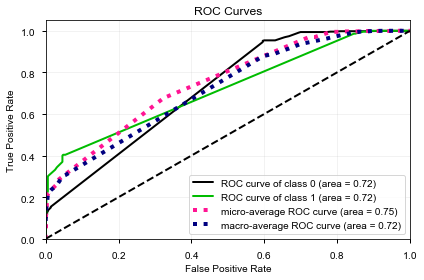

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


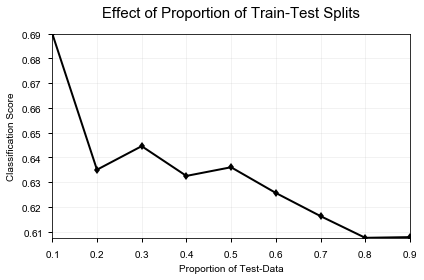

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.56   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


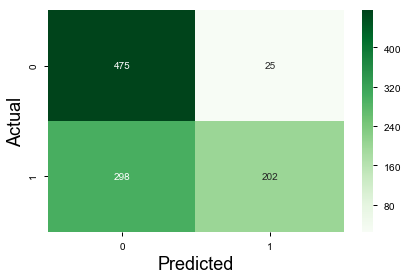

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


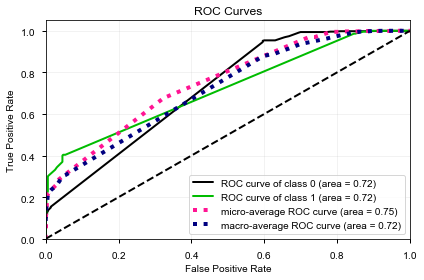

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


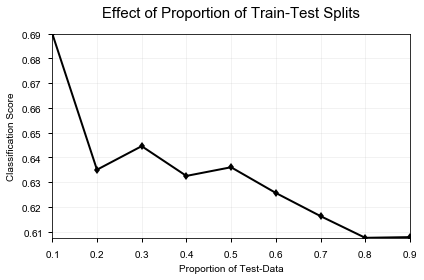

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.55   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


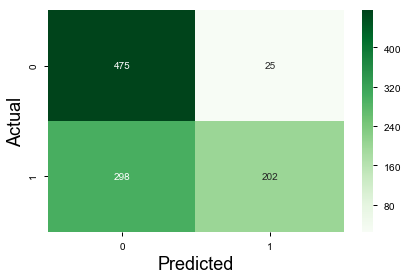

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


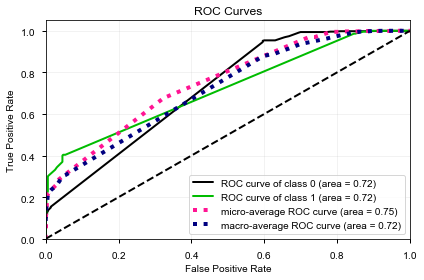

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


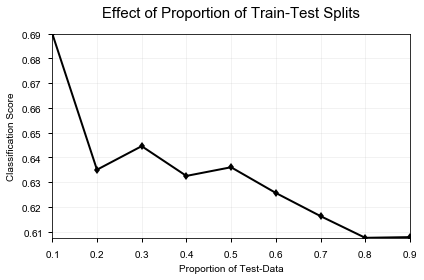

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.53   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


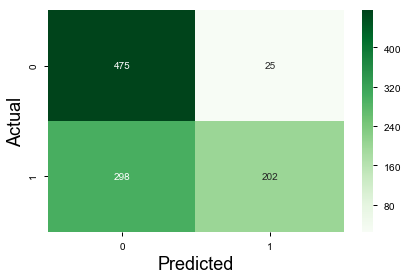

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


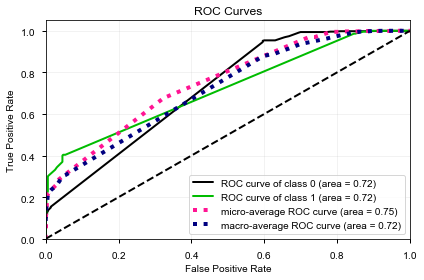

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


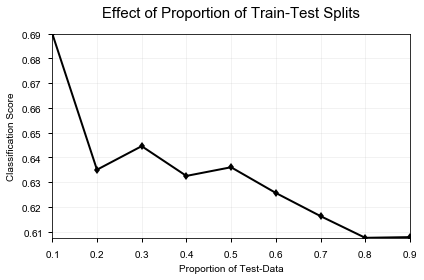

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.53   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


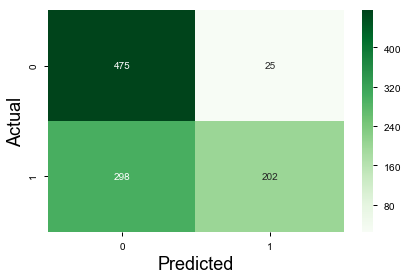

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


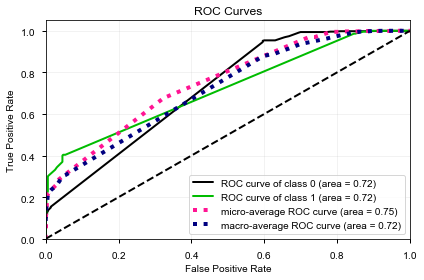

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


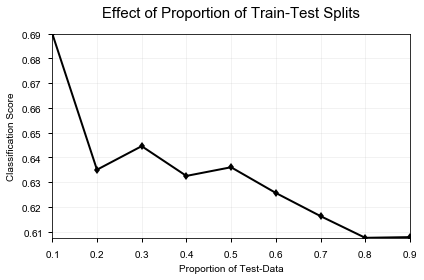

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.53   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


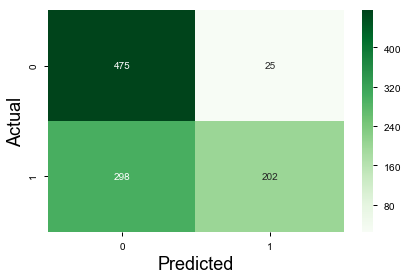

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


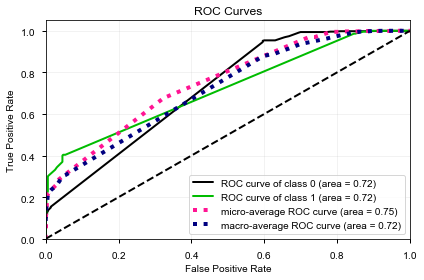

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


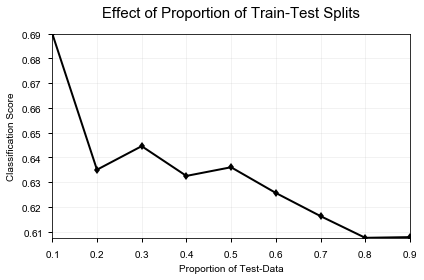

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.45   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


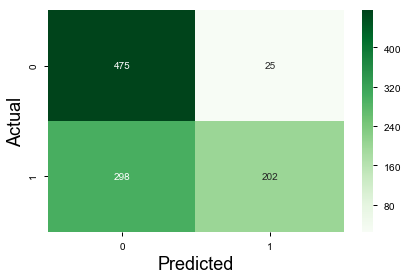

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


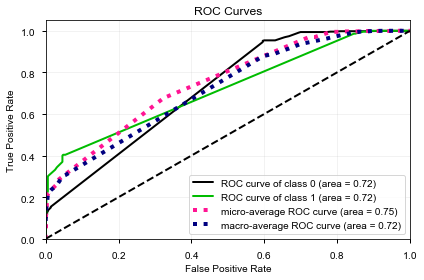

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


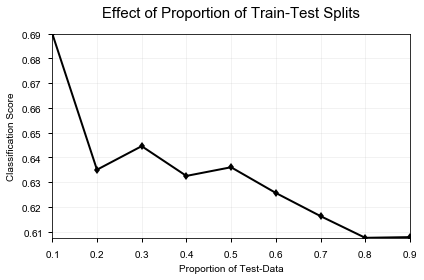

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.47   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


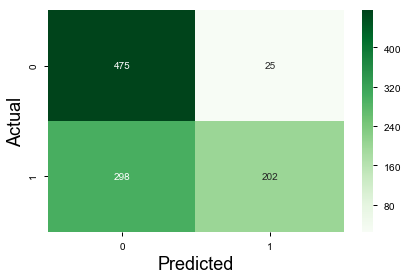

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


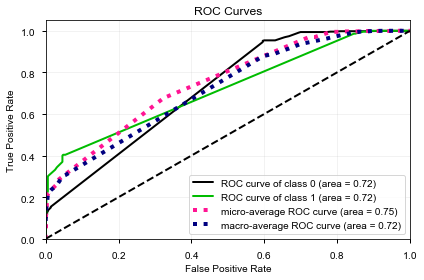

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


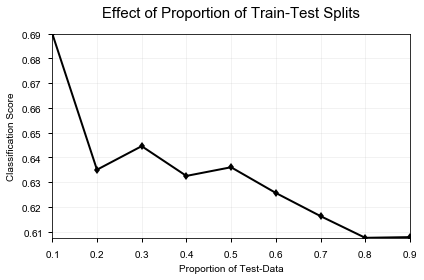

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.46   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


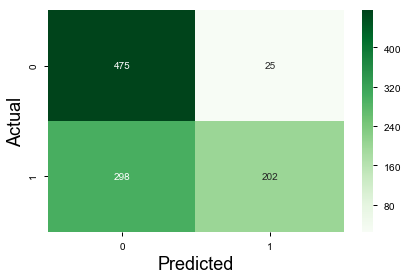

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


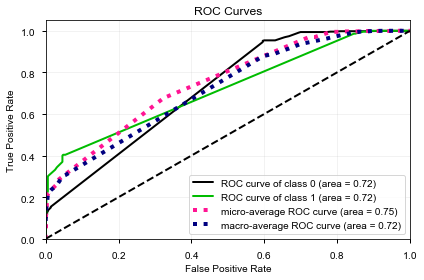

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


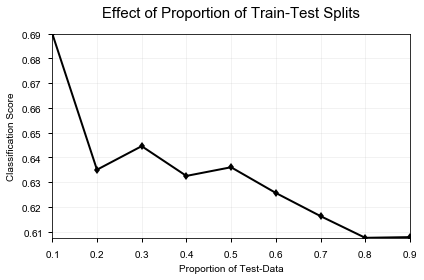

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.46   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


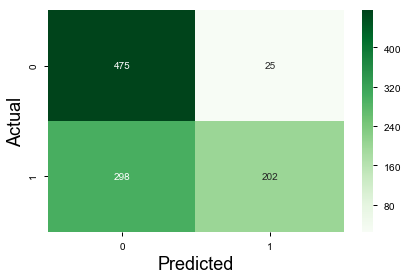

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


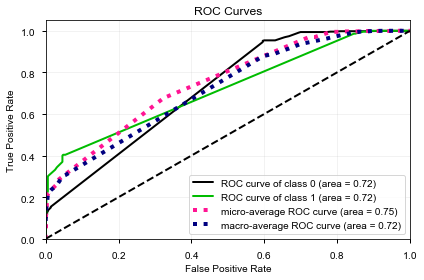

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


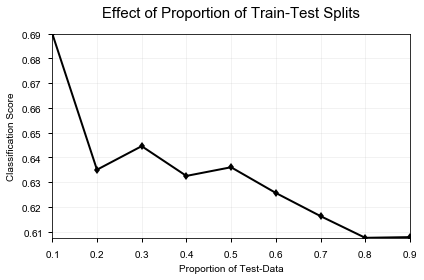

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.485   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


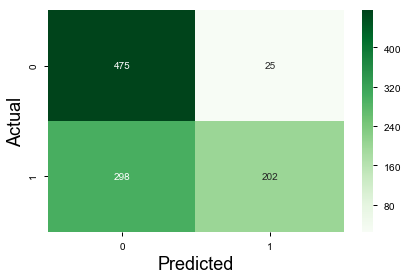

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


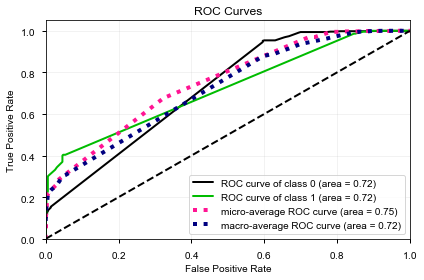

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


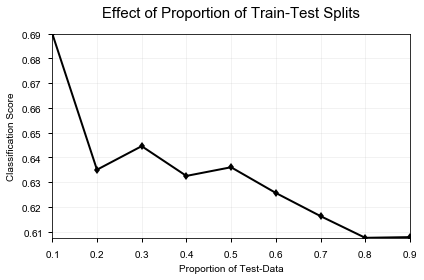

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.465   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


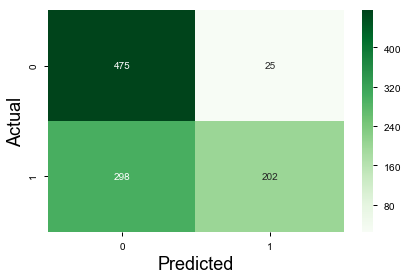

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


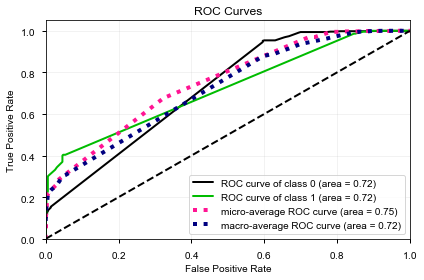

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


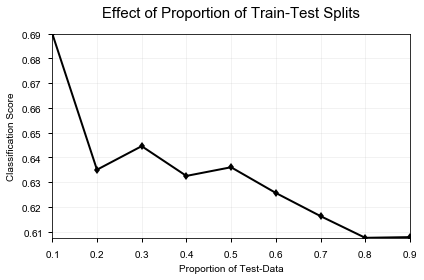

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.505   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


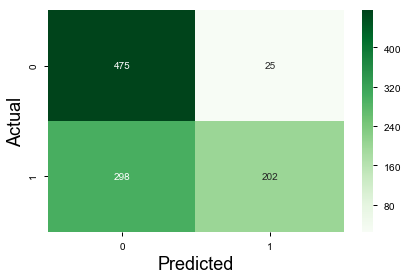

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


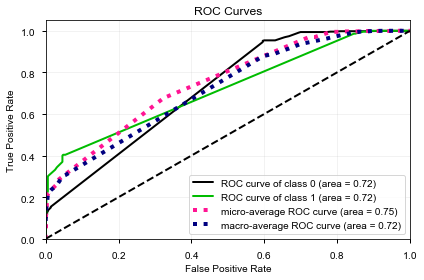

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


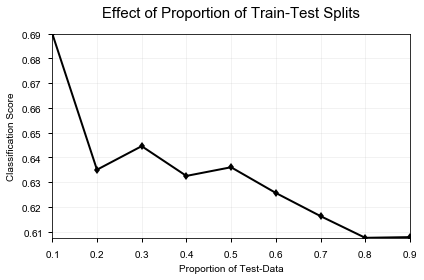

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.405   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


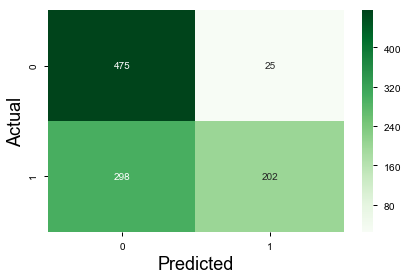

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


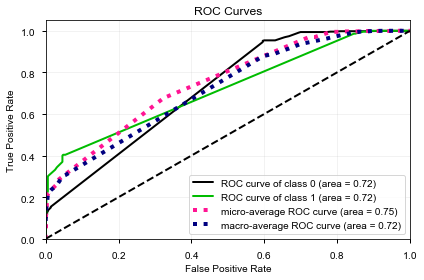

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


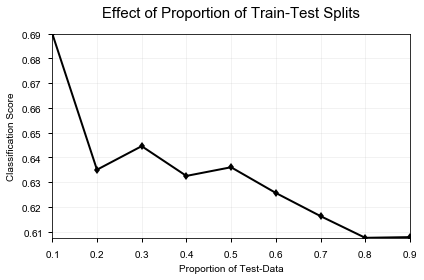

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.53   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


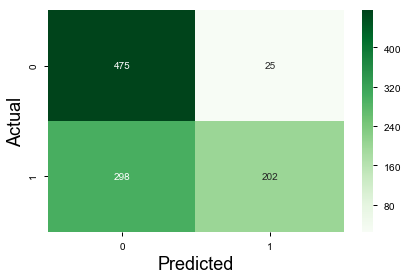

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


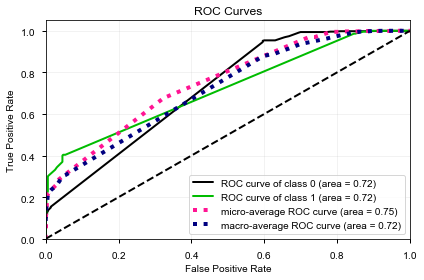

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


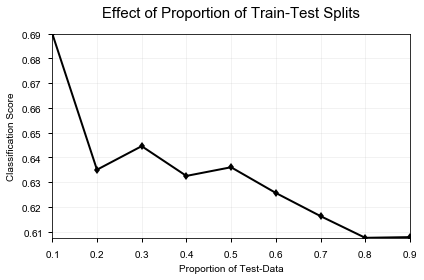

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.52   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


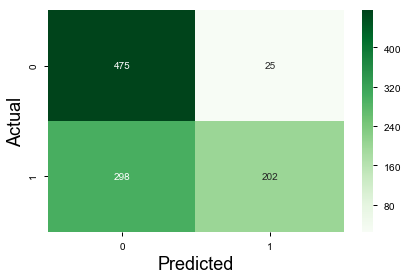

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


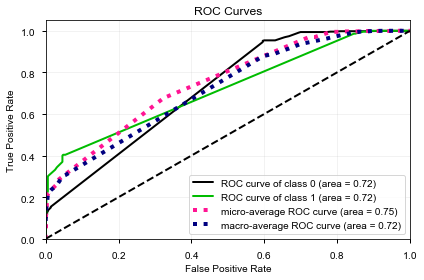

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


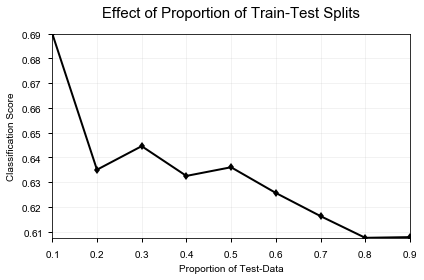

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.575   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


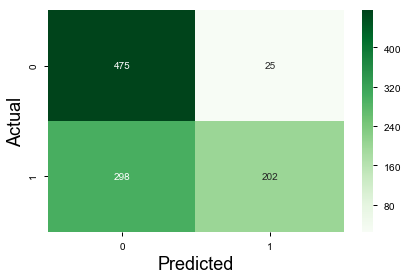

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


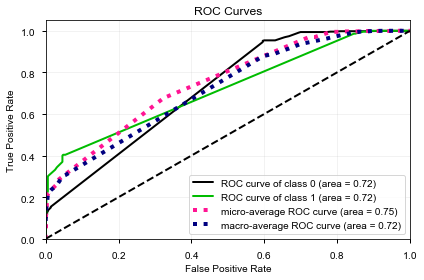

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


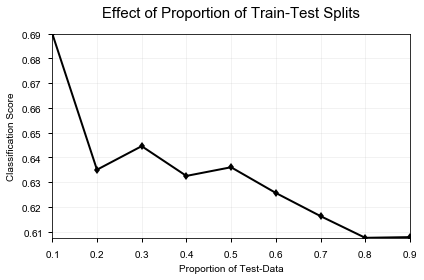

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.535   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


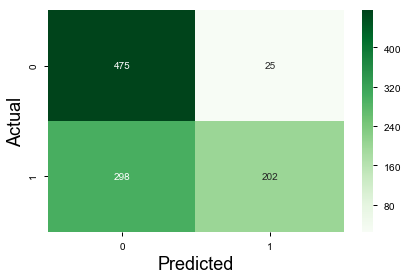

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


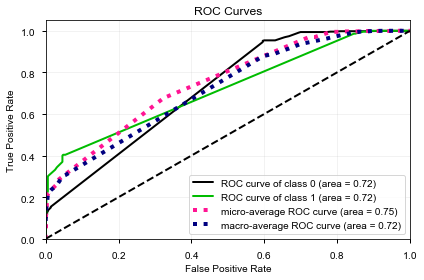

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


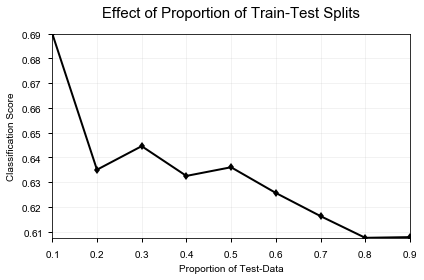

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0  0.535   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


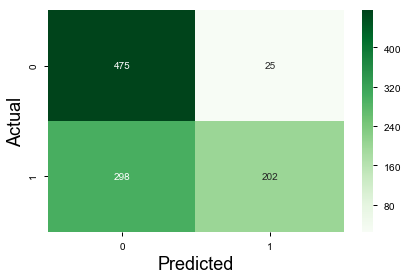

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


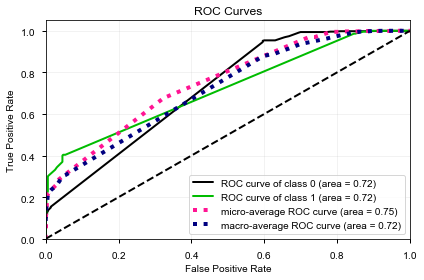

===================================Split Shapes========================================
     X_train     X_test y_train  y_test
0  (900, 99)  (100, 99)  (900,)  (100,)
1  (800, 99)  (200, 99)  (800,)  (200,)
2  (699, 99)  (301, 99)  (699,)  (301,)
3  (600, 99)  (400, 99)  (600,)  (400,)
4  (500, 99)  (500, 99)  (500,)  (500,)
5  (399, 99)  (601, 99)  (399,)  (601,)
6  (299, 99)  (701, 99)  (299,)  (701,)
7  (200, 99)  (800, 99)  (200,)  (800,)
8  (100, 99)  (900, 99)  (100,)  (900,)
===================================Graphics========================================


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


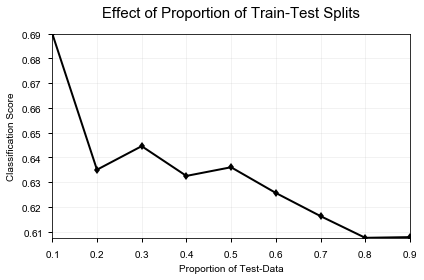

==============================================Summary================================================
============================================Classes Values===========================================
1    500
0    500
Name: score, dtype: int64
==========================df_holdouts======================================
   20pct  sample
0   0.59   0.677
Number of mislabeled points out of a total 1000 points : 323
========================================================METRICS==========================================
True Negatives:  475
False Positives:  25
False Negatives:  298
True Positives:  202
Accuracy 67.70%:
Precision 0.89
Recall 0.40
Specificity 0.95
F1 Score 0.56
F2 0.45
F0.5 0.72
Predicted    0    1
Actual             
0          475   25
1          298  202


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


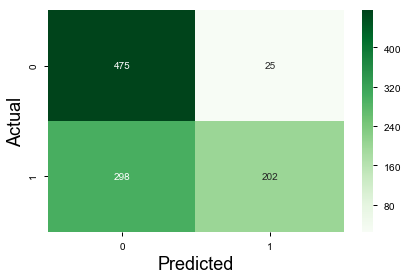

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


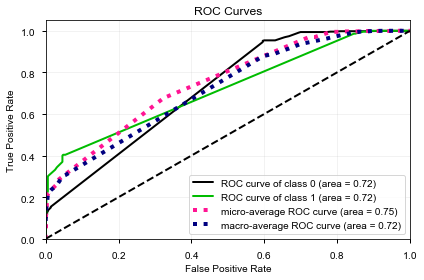

In [11]:
try:
    log_file = open("err_sentiment.log", "a")    
    
    for key in keywords_list:
        # Note that we add spaces around the key so that we're getting the word,
        # not just pattern matching.
        sms_raw[str(key)] = sms_raw.sentence.str.contains(
            ' ' + str(key) + ' ',
            case=False
        )
    X = sms_raw[keywords_list]
    y = sms_raw['score']
    for i in range(50):    
        do_split_diagnosis()
        do_holdouts()
        do_pred()
        do_summary()
        do_confusion()
        do_roc()

    sms_raw.drop(keywords_list,axis=1,inplace=True)
    
except Exception as e:
    log_file.write("Failed to finish processing: {0}\n".format(e))
    print("\nFinished Processing with errors\n")

finally:
    if not log_file.closed:
        log_file.close()
        


## END
